# ECE 311 Lab Final:

## Due Date: 12/11 @ 11:59PM
### Note: a 10% penalty will be applied for each hour your submission is late!

This lab final will review the import concepts from the course. Much of this lab should be familiar from previous labs. We encourage you to look back on your previous labs or look at the posted lab solutions on the course website to remind you how to produce your results and evaluate their correctness. Enough talking, let's get started!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from scipy import signal
from pz_plot import pz_plot
from scipy.io import wavfile
from numpy.random import randn
from IPython.display import Audio

#Utility function for dB scaling of magnitude spectra
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)

%matplotlib inline

### Wang, Jie
12/09/2022 1.0 -> 12/11/2022 debug
### netid: jiew5
## Notice: I modified some answering area to better display and split ans with markdown format

## Exercise 1: Building an Edge Detector 2.0

In Lab 2 Exercise 4, we built a simple edge detector by applying a high-pass filter along the rows and columns of an image, then combined the two results to create an image of detected edges. In this exercise, we will build a more sophisticated edge detector by adding onto our original design. This improved detector is known as the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator).

The Sobel operator uses the same intuition of finding horizontal and vertical edges separately, then combining these results to form the image. Let $G_x$ be our resulting image from detecting vertical edges (through the x-axis) and $G_y$ be our resulting image from detecting horizontal edges (through the y-axis, then our final result will be given by

$$
G[i,j] = \sqrt{G^2_x[i,j]+G^2_y[i,j]},
$$

where $G[i,j]$ is the pixel value at row $i$, column $j$. We compute $G_x$ and $G_y$ via convolution as follows:

$$
G_x = I * \begin{bmatrix}
1 & 0 & -1\\
\end{bmatrix} * \begin{bmatrix}
1\\
2\\
1\\
\end{bmatrix}
$$

$$
G_y = I * \begin{bmatrix}
1\\
0\\
-1\\
\end{bmatrix} * \begin{bmatrix}
1 & 2 & 1\\
\end{bmatrix},
$$

where **$I$ is our original image** and $*$ denotes the convolution operator. Note that in the computation of $G_x$ we convolve along the rows with a high-pass filter and convolve along the columns with a low-pass filter, while the computation of $G_y$ reverses this relationship with the same filters.

a. Compute the image $G_x$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **row** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **column**. Also, be sure to use the "same" mode when using $\textrm{signal.convolve()}$.

b. Compute the image $G_y$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **column** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **row**.

c. Create final result image $G$ according to the above formulation. Plot your resulting image in grayscale.

Text(0.5, 1.0, 'Edge detacted image')

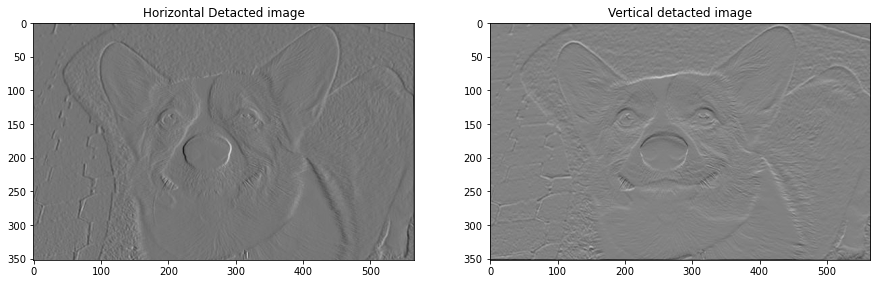

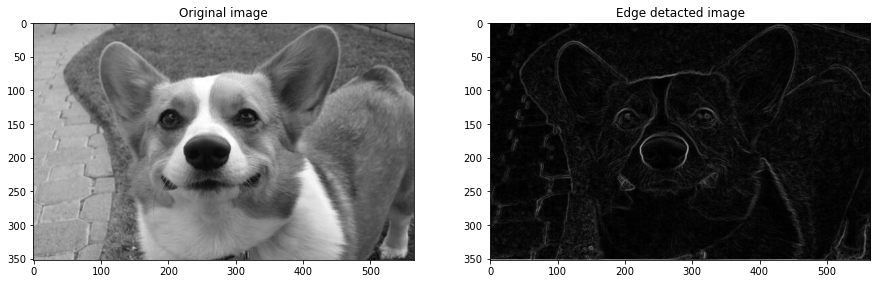

In [2]:
#load test-image.jpg
image = imread('test-image.jpg')
n_rows,n_cols = image.shape

#Code for part a.
# A1 is the high-pass filter, A2 is the low-pass filter
A1 = np.matrix('1,0,-1')
A1_T = A1.transpose()
A2 = np.matrix('1,2,1')
A2_T = A2.transpose()
# print(A1_T)
# print( A2) 

# Q: difference?
Gx = signal.convolve(image,signal.convolve(A1,A2_T,'same' ) ,'same'  )
# for row in range(n_rows):
    # Gx[row,:] = 1

# print(Gx)
#Code for part b:
Gy = signal.convolve(image,signal.convolve(A1_T,A2,'same'),'same')

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(Gx,'gray')
plt.title("Horizontal Detacted image")
plt.subplot(122)
plt.imshow(Gy,'gray')
plt.title("Vertical detacted image")

#Code for part c:
G = np.zeros(image.shape)

for row in range(n_rows):
    for col in range(n_cols):
        G[row,col] = np.sqrt(Gx[row,col]**2 + Gy[row,col]**2)
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(image,'gray')
plt.title("Original image")
plt.subplot(122)
plt.imshow(G,'gray')
plt.title("Edge detacted image")




## Exercise 2: LCCDE, Transfer Function, and Impulse Response

For each of the following Linear Constant Coefficient Difference Equations (LCCDE), determine the transfer function (numerator and denominator coefficients) in order to plot both the pole-zero plot and impulse response of the system for the requested number of points. **Please plot your impulse responses as a stem plot!** For each system, indicate whether it is BIBO stable, marginally stable, or not BIBO stable and briefly explain your choice.

Note: We have provided the $\textrm{pz-plot}()$ function from Lab 3 to create your pole-zero plots. Refer to Lab 3 for usage of this function. Some other functions of interest you may want to use from Lab 3 will be $\textrm{signal.dimpulse()}$ and $\textrm{signal.tf2zpk()}$.

a. $y_1[n] = \frac{1}{3}x[n]-\frac{1}{9}x[n-1]+x[n-2]-
\frac{1}{9}x[n-3]+\frac{1}{3}x[n-4],\quad 0\leq n < 8$

b. $y_2[n] = x[n] + \frac{1}{4}x[n-2] - y_2[n-1] + 6y_2[n-2],\quad 0\leq n < 20$

c. $y_3[n] = x[n] - \frac{1}{2}x[n-2] - y_3[n-2], \quad 0\leq n < 20$

In [3]:
# PZ generator
# Designed in lab3
# A helper function to pretty print the required information
def PZ_generator(a,b,id,number):
    z, p, k = signal.tf2zpk(b, a) # k is system gain -> okay to ignore this
    print("-----",id,"-----")
    print('Poles:', p)
    print('Zeros:', z)
    name = 'Pole-Zero Plot ' + str(id)
    pz_plot(z, p, name)
    n,y = signal.dimpulse((b, a, 1), n=number) # the 1 is for the change in time per sample, n points for output
    h_n = y[0] # need to access output from returned object
    plt.figure()
    plt.stem(n, h_n) # plot first given number samples of impulse response
    plt.xlabel('n')
    plt.ylabel('Output Signal')
    name2 = 'Impulse Response of System <' + str(id) + '>'
    plt.title(name2)
    #print("-------------")

    return

----- a -----
Poles: [0. 0. 0. 0.]
Zeros: [0.12026537+1.60542522j 0.12026537-1.60542522j 0.04640129+0.61941193j
 0.04640129-0.61941193j]


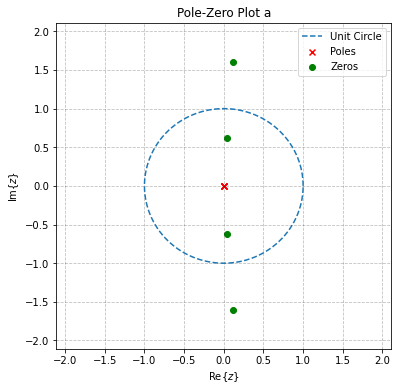

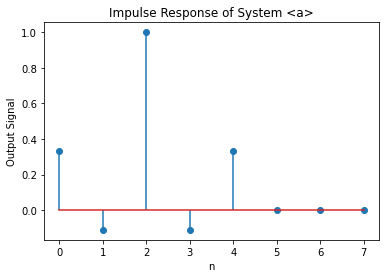

In [4]:
#Code for exercise 2-a:
b1 = [1/3,-1/9,1,-1/9,1/3]
a1 = [1,0,0,0,0]
PZ_generator(a1,b1,'a',8)

### Comment for 2-a
-  The system is **BIBO** because all poles are within the unit circle 

----- b -----
Poles: [-3.  2.]
Zeros: [-0.+0.5j  0.-0.5j]


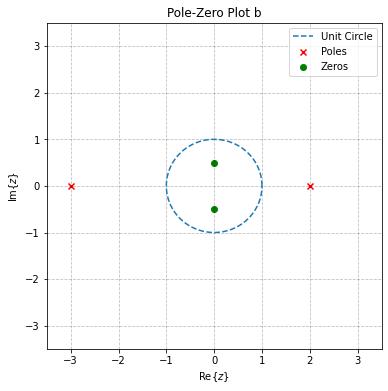

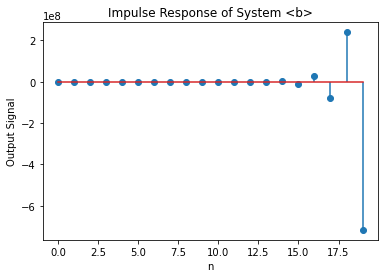

In [5]:
#Code for exercise 2-b:
b1 = [1,0,0.25]
a1 = [1,1,-6]
PZ_generator(a1,b1,'b',20)

### Comment for 2-b
- The system is not BIBO because there exist poles out of the unit circle

----- c -----
Poles: [-0.+1.j  0.-1.j]
Zeros: [ 0.70710678 -0.70710678]


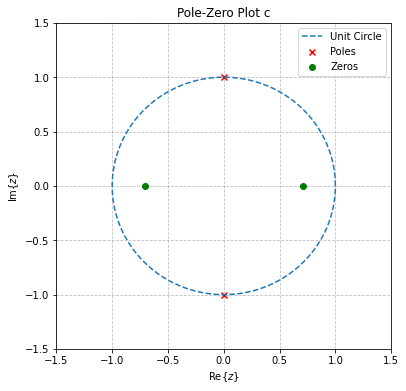

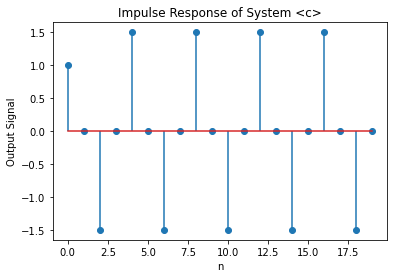

In [6]:
#Code for exercise 2-c:
b1 = [1,0,-0.5]
a1 = [1,0,1]
PZ_generator(a1,b1,'c',20)

### Comments for 2-c
- The system is marginally BIBO stable because all the poles are on the unit circle and the unit circle is within the ROC


## Exercise 3: Windows and Spectral Resolution

**Note: please specify 512 points for each FFT you take in this problem!**

a. Plot the magnitude spectrum (not dB scale) of the following signal using $\textrm{np.fft.rfft()}$.

$$
x_2[n] = 0.5\sin\left(0.5\pi n\right) + 0.02\sin\left(0.6\pi n\right), \quad 0\leq n < 80
$$

What is happening to the second sinusoid with the smaller magnitude in the frequency domain? Is it easy to locate this frequency peak?

b. Fill in the function $\textrm{modify()}$ below which applies a Hamming window to an input signal. Apply this function to $x_2[n]$ and plot the resulting magnitude spectrum. Is it easier to locate the smaller frequency now?

c. Now let's try resolving two close, but equally large frequency peaks in the below signal $x_2[n]$.

$$
x_2[n] = 0.5\sin\left(0.6\pi n\right) + 0.5\sin\left(0.618\pi n\right), \quad 0\leq n < 80
$$

Plot the magnitude spectrum of $x_2[n]$ (not dB scale) before and after applying the $\textrm{modify()}$ function. Is it easier to differentiate between the two peaks after applying the Hamming window? Why or why not? **Hint: think about the tradeoff between rectangular and Hamming windows!**


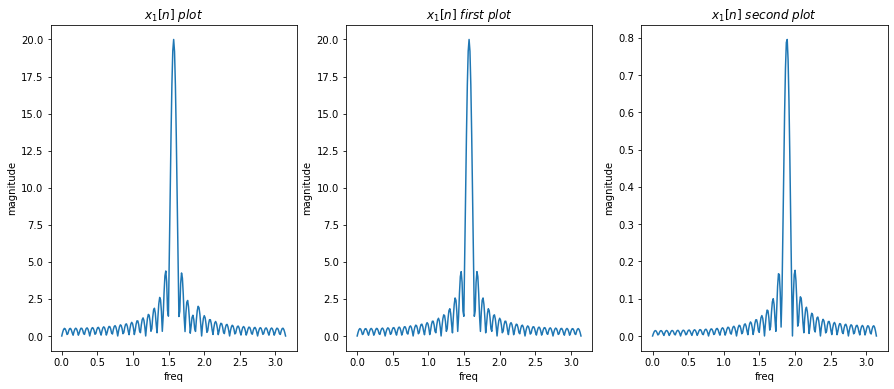

In [7]:
#Code for part 3.a:
x_1 = np.array([0.5*np.sin(0.5*np.pi*n)+0.02*np.sin(0.6*np.pi*n) for n in range(80)])
x_1_first = np.array([0.5*np.sin(0.5*np.pi*n) for n in range(80)])
x_1_second = np.array([0.02*np.sin(0.6*np.pi*n) for n in range(80)])

fft_x1 = np.fft.rfft(x_1,512)
fft_x1_first = np.fft.rfft(x_1_first,512)
fft_x1_second = np.fft.rfft(x_1_second,512)

w1 = np.linspace(0,np.pi,len(fft_x1))
w1_first = np.linspace(0,np.pi,len(fft_x1_first))
w1_second = np.linspace(0,np.pi,len(fft_x1_second))
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.title("$x_1[n] \ plot$")
plt.xlabel("freq")
plt.ylabel("magnitude")
plt.plot(w1,abs(fft_x1))
plt.subplot(132)
plt.title("$x_1[n] \ first \ plot$")
plt.xlabel("freq")
plt.ylabel("magnitude")
plt.plot(w1_first,abs(fft_x1_first))
plt.subplot(133)
plt.title("$x_1[n] \ second \ plot$")
plt.xlabel("freq")
plt.ylabel("magnitude")
plt.plot(w1_second,abs(fft_x1_second))



comments for 3-a:
- It is hard to observe the second sinusoid througth magintude plot.
- Because first sinusoid peak covers the second one, making it hard to locate the peak
- Shown on the graph above, I also plot the first and second term's magnitude response, it's clear that the peak of two terms fall on different freqency,which may cause alising in $x_2[n]$

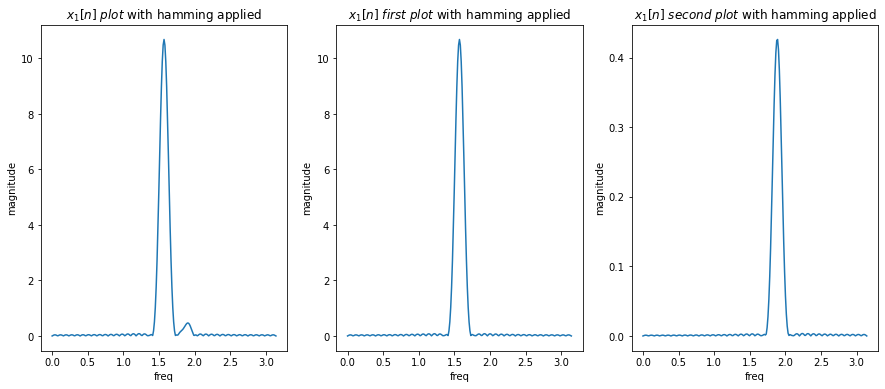

In [8]:
#Code for part 3.b:
def modify(x):
    #apply a hamming window to the signal
    modified = x * np.hamming(len(x))
    return modified
x_1_hamming = modify(x_1)
x_1_first = modify(x_1_first)
x_1_second = modify(x_1_second)

fft_x1 = np.fft.rfft(x_1_hamming,512)
fft_x1_first = np.fft.rfft(x_1_first,512)
fft_x1_second = np.fft.rfft(x_1_second,512)

w1 = np.linspace(0,np.pi,len(fft_x1))
w1_first = np.linspace(0,np.pi,len(fft_x1_first))
w1_second = np.linspace(0,np.pi,len(fft_x1_second))
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.title("$x_1[n] \ plot$ with hamming applied")
plt.xlabel("freq")
plt.ylabel("magnitude")
plt.plot(w1,abs(fft_x1))
plt.subplot(132)
plt.title("$x_1[n] \ first \ plot$ with hamming applied")
plt.xlabel("freq")
plt.ylabel("magnitude")
plt.plot(w1_first,abs(fft_x1_first))
plt.subplot(133)
plt.title("$x_1[n] \ second \ plot$ with hamming applied")
plt.xlabel("freq")
plt.ylabel("magnitude")
plt.plot(w1_second,abs(fft_x1_second))


comments for 3-b:
- After applying hamming window, it is clear that the magnitude peaks become quite obvious, and we can locate the second term clearly form the image

3-c x_2[n] before applying hamming window
3-c x_2[n] after applying hamming window


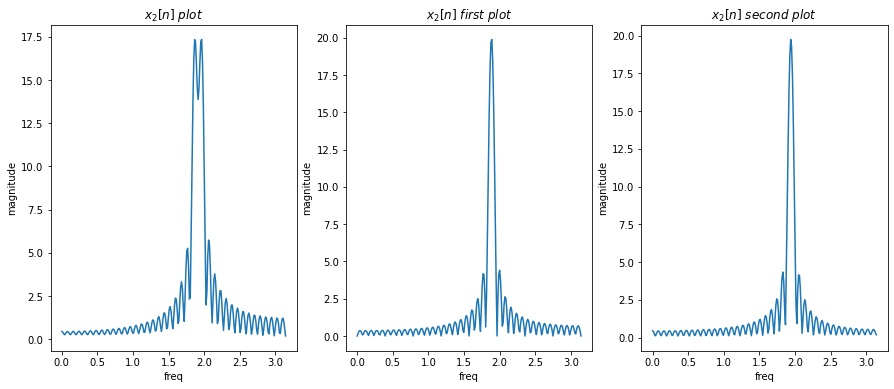

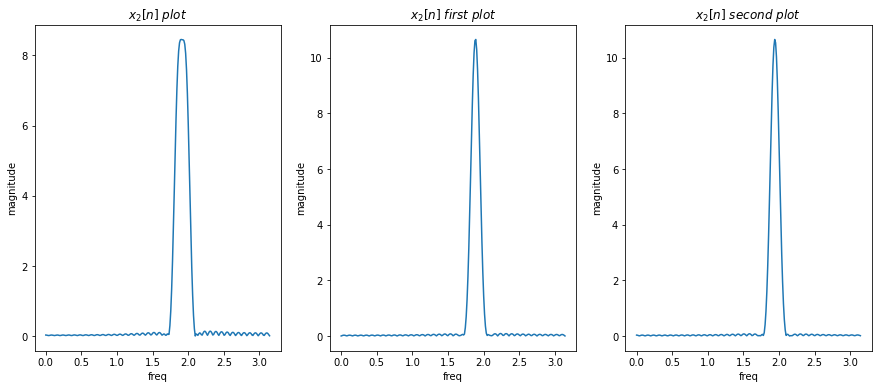

In [9]:
#Code for part 3.c:
x_2 = np.array([0.5*np.sin(0.6*np.pi*n)+0.5*np.sin(0.618*np.pi*n) for n in range(80)])
x_2_first = np.array([0.5*np.sin(0.6*np.pi*n) for n in range(80)])
x_2_second = np.array([0.5*np.sin(0.618*np.pi*n) for n in range(80)])

fft_x1 = np.fft.rfft(x_2,512)
fft_x1_first = np.fft.rfft(x_2_first,512)
fft_x1_second = np.fft.rfft(x_2_second,512)

w1 = np.linspace(0,np.pi,len(fft_x1))
w1_first = np.linspace(0,np.pi,len(fft_x1_first))
w1_second = np.linspace(0,np.pi,len(fft_x1_second))
print("3-c x_2[n] before applying hamming window")
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.title("$x_2[n] \ plot$")
plt.xlabel("freq")
plt.ylabel("magnitude")
plt.plot(w1,abs(fft_x1))
plt.subplot(132)
plt.title("$x_2[n] \ first \ plot$")
plt.xlabel("freq")
plt.ylabel("magnitude")
plt.plot(w1_first,abs(fft_x1_first))
plt.subplot(133)
plt.title("$x_2[n] \ second \ plot$")
plt.xlabel("freq")
plt.ylabel("magnitude")
plt.plot(w1_second,abs(fft_x1_second))
print("3-c x_2[n] after applying hamming window")
x_2 = modify(x_2)
x_2_first = modify(x_2_first)
x_2_second = modify(x_2_second)

fft_x1 = np.fft.rfft(x_2,512)
fft_x1_first = np.fft.rfft(x_2_first,512)
fft_x1_second = np.fft.rfft(x_2_second,512)
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.title("$x_2[n] \ plot$")
plt.xlabel("freq")
plt.ylabel("magnitude")
plt.plot(w1,abs(fft_x1))
plt.subplot(132)
plt.title("$x_2[n] \ first \ plot$")
plt.xlabel("freq")
plt.ylabel("magnitude")
plt.plot(w1_first,abs(fft_x1_first))
plt.subplot(133)
plt.title("$x_2[n] \ second \ plot$")
plt.xlabel("freq")
plt.ylabel("magnitude")
plt.plot(w1_second,abs(fft_x1_second))


Comments for part 3.c:
- We can't distinguish two peaks after applying the hamming window.
- For the case of original x_2, the two terms have similar magintude, and we can distinguish them due easily. That means hamming window is useless and bad to our observation
- For the case of hamming x_2, the two terms have similar magintude, and we can't distinguish them, they are merged into one peak
- The reason behind this is because Hamming funciton will do DTFT on the original signal, when the two peaks are close and similar in magnitude, they will instead be combined together, that is the trade-ff of hamming method. 


## Exercise 4: Chirp Redux

For this exercise, we will revisit the chirp activity from Lab 4 but this time with the help of spectrograms to visualize our chirps. The below provided code creates a five second long chirp signal with sampling rate $f_s = 44,100~Hz$ and maximum signal frequency $22,050~Hz$. Recall that the $\textrm{signal.chirp}$ function linearly sweeps between the requested frequencies over the set time interval. Hint: referring back to Labs 4 and 5 will help with understanding the chirp function and plotting spectrograms, respectively.

a. Plot the **spectrogram** of the original chirp signal we have generated for you.

b. Reduce the sampling rate of the original chirp signal by a factor of 5. Plot the resulting spectrogram and explain what you see. If we listened to this audio signal, how many rises and falls would you hear? **Note: you may either create a new chirp signal using the requested lower sampling or perform downsampling without an anti-aliasing filter.**

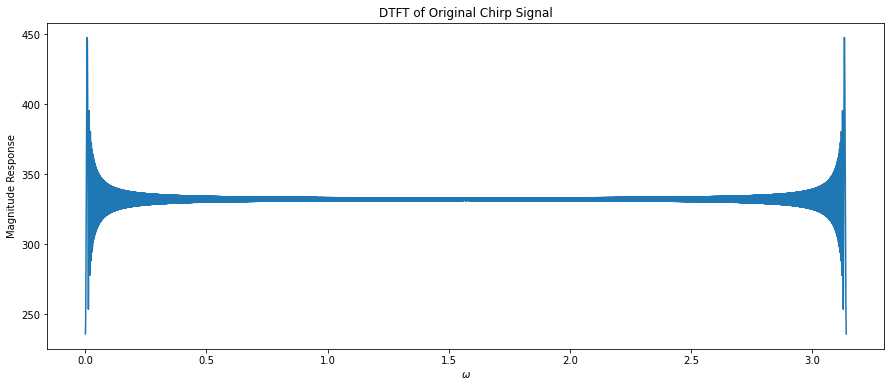

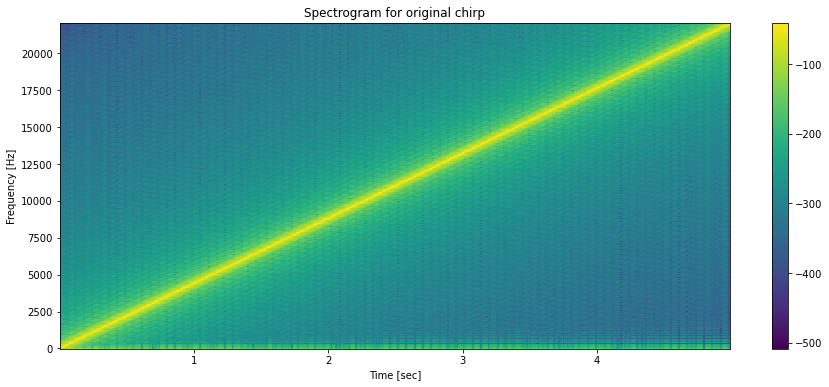

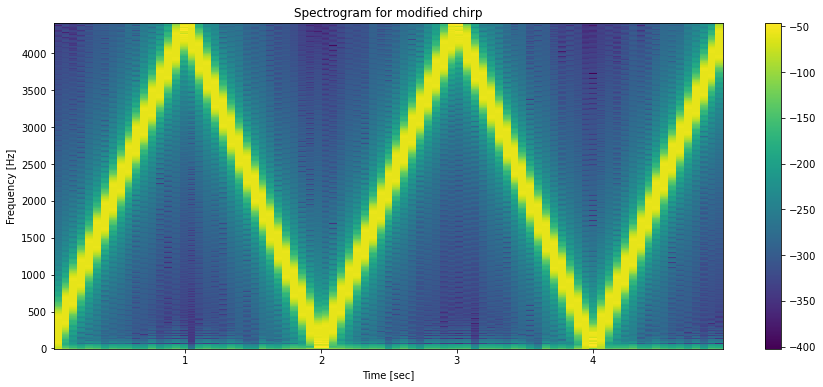

In [16]:
Fs = 44100 #sampling rate for audio clip in Hz
t1 = 5 #make clips 5 seconds
t = np.linspace(0,t1,t1*Fs)
f0 = 0 #start frequency (Hz)
f1 = 22050 #end frequency (Hz)
chirp_original = signal.chirp(t,f0 = f0, t1 = t1, f1 = f1)
nfft = 1024
original_fft = np.fft.rfft(chirp_original)
w_original = np.linspace(0, np.pi, len(original_fft))

#Code for part 4.a:
plt.figure(figsize=(15,6))
plt.title('DTFT of Original Chirp Signal')
plt.plot(w_original,np.absolute(original_fft))
plt.xlabel('$\omega$')

plt.ylabel('Magnitude Response')
'''
scipy.signal.spectrogram(x, fs=1.0, window=('tukey', 0.25), 
nperseg=None, noverlap=None, nfft=None, detrend='constant', 
return_onesided=True, scaling='density', axis=- 1, mode='psd')
'''
#Code for part 4.b:
f_chirp, t_chirp, S_chirp = signal.spectrogram(chirp_original, Fs, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)
plt.figure(figsize=(15,6))
plt.pcolormesh(t_chirp, f_chirp, sig2db(S_chirp))
plt.title('Spectrogram for original chirp')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

#Code for part 4.b:
Fs_reduced=Fs/5
t_reduced=np.linspace(0,t1,int(t1*Fs_reduced))
chirp_reduced=signal.chirp(t_reduced,f0=f0,t1=t1,f1=f1)
f_r_chirp, t_r_chirp, S_r_chirp = signal.spectrogram(chirp_reduced, Fs_reduced, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)
plt.figure(figsize=(15,6))
plt.pcolormesh(t_r_chirp, f_r_chirp, sig2db(S_r_chirp))
plt.title('Spectrogram for modified chirp')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()


In [11]:
# BE CAREFUL WITH YOUR VOLUME! CHIRP SEQUENCES CAN BE LOUD!

Audio(data=chirp_original, rate=Fs) # give it a listen

In [12]:
# BE CAREFUL WITH YOUR VOLUME! CHIRP SEQUENCES CAN BE LOUD!

Audio(data=chirp_reduced, rate=Fs/5) # give it a listen

Comments for 4.b:
- Original: 1 long rise, 0 fall
- Reduced by 5: 3 rises, 2 falls
- Due to aliasing of the chirped signal at 1/5 of Nyquist sampling rate . Essentially, only 1/5 of the frequencies map from 0 to π, so the next 1/5 maps from −π to 0 and behaves as a decline. 
- This process happens again for the 3/5 and 4/5 parts of the signal, with the final fifth mapping to 4π−5π, corresponding to 0−π. 
- As a result, the modified signal has three complete rises and two complete falls.


## Exercise 5: FIR Filter Design

a. Given the audio signal file ``Sound_original.wav``, compute and display the full FFT magnitude spectrum (no dB scale). Try listening to it!

b. Now let's assume that we pass this audio signal into a system described as followed.

<img src="./sys_illus.png" alt="Drawing" style="width: 600px;"/>

where $x[n]$ is our audio signal, $H(\omega)$ is an LTI system with impulse response $h[n]$, $d[n]$ is some noise, and $y[n]$ is the ouput. 
For this question, we want to simulate the ouput result $y[n]$.

We only know that the LTI system $H(\omega)$ is acting like a low-pass filter with a cutoff frequency of $\frac{\pi}{3}$. Use $\textrm{signal.remez()}$ to obtain the impulse response of this system assuming the filter length is $N = 100$ and the transition bandwidth is $\frac{\pi}{10}$. Plot magnitude response **on a dB scale** using the provided $\textrm{sig2db()}$ function. 

c. Now, we can obtain output $y[n]$ by filtering $x[n]$ with $h[n]$ and adding $d[n]$ after filtering. 

Here, $d[n]$ is assumed to be additive white Gaussian noise (AWGN). We can create our noise $d[n]$ by typing

``d = 2250 * np.random.randn(len(x_filtered))``

Compute $y[n]$ by summing your filtered audio signal $x[n]*h[n]$ and d. Try listening to y! Plot the FFT magnitude spectrum of $d[n]$ and the FFT magnitude spectrum of $y[n]$ on separate figures (no dB scale). Judging from these two graphs, do you think the simple filtering methods we have discussed in class will be able to perfectly separate our noise $d[n]$ from the filtered audio $x[n]*h[n]$?

C:\Users\everloom\AppData\Local\Temp\ipykernel_15188\2308306781.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,original = wavfile.read('Sound_original.wav')


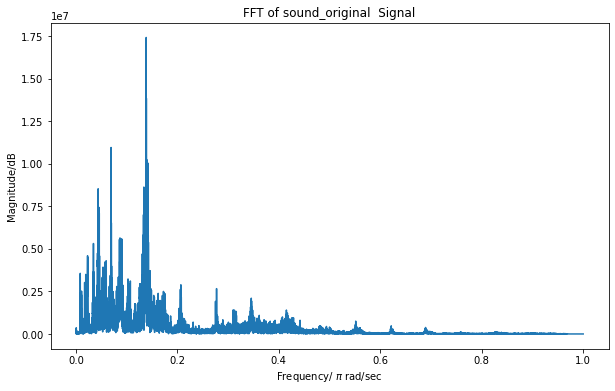

In [13]:
fs,original = wavfile.read('Sound_original.wav')
#Code for 5.a:
fft = np.fft.rfft(original)
w = np.linspace(0, np.pi, len(fft))

plt.figure(figsize=(10,6))
plt.title('FFT of sound_original  Signal')
plt.plot(w/np.pi, np.absolute(fft))
plt.xlabel('Frequency/ $\pi$ rad/sec')
plt.ylabel('Magnitude/dB')
# hallelujah
Audio(data=original, rate=fs) # give it a listen


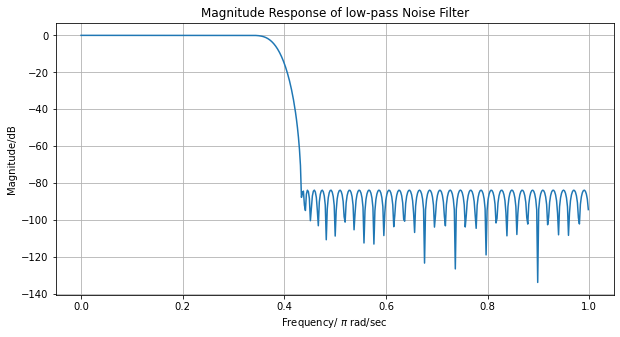

In [14]:
#Code for 5.b: mainly comes from lab6 
N = 100
a = [1, 0]
lpf_desired = [1, 0] # gain of one for passband, gain of zero for stopband
lpf_band = [0, 1/3, 1/3 +0.1,1]
lpf = signal.remez(N,lpf_band,lpf_desired,fs=2)
w, H_lpf = signal.freqz(lpf, a)

plt.figure(figsize=(10,5))
plt.title('Magnitude Response of low-pass Noise Filter')
plt.plot(w/np.pi, sig2db(np.absolute(H_lpf))) # use the function provided above in import part
plt.xlabel('Frequency/ $\pi$ rad/sec')
plt.ylabel('Magnitude/dB')
plt.grid()



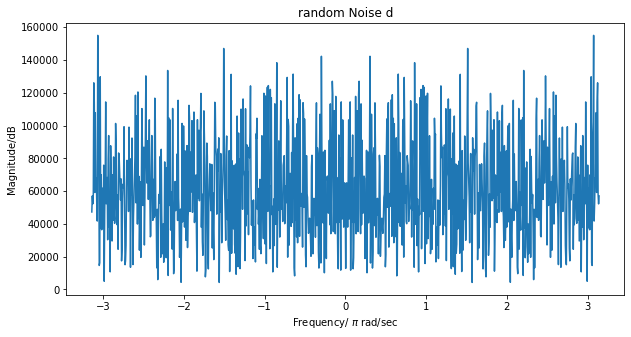

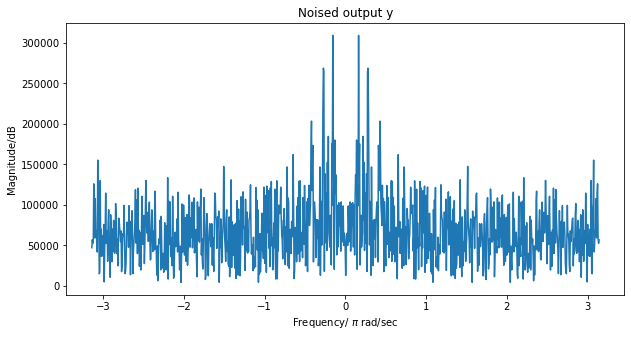

In [15]:
#Code for 5.c:
x_filtered = np.convolve(lpf,original)
d = 2250*np.random.randn(len(x_filtered))
y = x_filtered + d

d_fft = np.fft.fft(d,1024)
d_fft = np.fft.fftshift(d_fft)

y_fft = np.fft.fft(y,1024)
y_fft = np.fft.fftshift(y_fft)
#shift d and y to the middle
w = np.linspace(-np.pi, np.pi, len(y_fft))

plt.figure(figsize=(10,5))
plt.title('random Noise d')
plt.plot(w, np.absolute(d_fft)) # use the function provided above in import part
plt.xlabel('Frequency/ $\pi$ rad/sec')
plt.ylabel('Magnitude/dB')

plt.figure(figsize=(10,5))
plt.title('Noised output y')
plt.plot(w, np.absolute(y_fft)) # use the function provided above in import part
plt.xlabel('Frequency/ $\pi$ rad/sec')
plt.ylabel('Magnitude/dB')
# plt.grid()

# hallelujah(noise)
Audio(data=y, rate=fs) # give it a listen


Comments for 5.c:
- the noise d add much noise to the song, making it behaves like the old-style TV. 
- I don't think the filtering methods we learned are enougth to clearify such a complex noise, for the noise covers the whole freqency spectrum. This makes it impossible to filter it by simple fiter design: we can't tell which part of the signal are "useful and meaningful" and which parts are noise.

# Submission Instructions:

Please place all files in one folder, compress that folder as a zip file, and name the zip file ``netid_labfinal``. Submit your zip file to Canvas like previous labs.

## Thanks prof and TA for all the way!
ECE311 is a very pleasant lab, 
it's my honor and fortune to take it
--- Tony